In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

import numpy as np

from utils import plot_2d, plot_classifier_boundary, test_model, test_model_with_standard_scaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.neighbors import KNeighborsClassifier as kNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score as acc

import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

plt.rcParams['figure.figsize'] = [8, 7]
plt.rcParams['figure.dpi'] = 100

In [4]:
import numpy as np
from numpy import concatenate 
import matplotlib.pyplot as plt
import pandas as pd
# colors is useful for mapping colors to numbers
from matplotlib import colors

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import colors

In [6]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

AUC score: 0.828


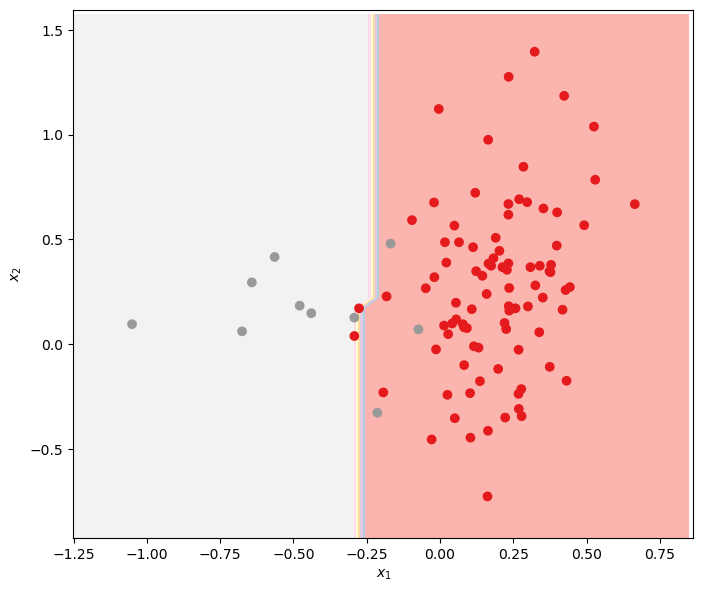

In [10]:
def lda_1():
    tr_X, tr_y = make_classification(
        n_samples=100, #ok
        n_features=2, #ok
        n_redundant=0, #ok
        n_informative=2, #ok
        class_sep=0.2,#ok
        flip_y=0.01, #ok - default
        n_clusters_per_class=1, #ok
        weights=[0.9, 0.1], # Note that the actual class proportions will not exactly match weights when flip_y isn’t 0.
        random_state=1, #ok
        )
    
    return tr_X, tr_y

X, y = lda_1()
lda = LDA()
test_model(lda, X, y)

In [11]:
def data_dt():

    # kNN score - 0.78 (k = 12) 0.70 (k = 3)
    # DT score - 0.63
    # dt_X, dt_y = make_blobs(
    #     n_samples=[700, 200], 
    #     centers=[(3,5),(6,5)],             
    #     n_features=2, 
    #     cluster_std=[5, 4],
    #     random_state=1, 
    #     shuffle=False)

    # kNN score - 0.86 (12)
    # DT score - 0.88 (15, 10)
    # dt_X, dt_y = make_blobs(
    #     n_samples=[200, 200], 
    #     centers=[(3,5),(6,5)],             
    #     n_features=4, 
    #     # cluster_std=[2, 1],
    #     random_state=1, 
    #     shuffle=False)

    dt_X, dt_y = make_blobs(
        n_samples=500, 
        centers=[(3,5),(6,5)],             
        n_features=5, 
        cluster_std=[1, 1],
        random_state=42, 
        )

    # dt_X, dt_y = make_circles(
    #     noise=0.2, 
    #     factor=0.5, 
    #     random_state=1)

    # dt_X, dt_y = make_blobs(
    #     n_samples=[300, 200], 
    #     centers=[(3,5),(6,5)],             
    #     n_features=2, 
    #     # cluster_std=[5, 4],
    #     random_state=1, 
    #     shuffle=False)

    # knn - 0.89 
    # dt - 0.89
    # dt_X, dt_y = m'ake_moons(
    #     n_samples=[200, 200], 
    #     noise=0.3)'

    return dt_X, dt_y

DT dataset shape: (500, 2)


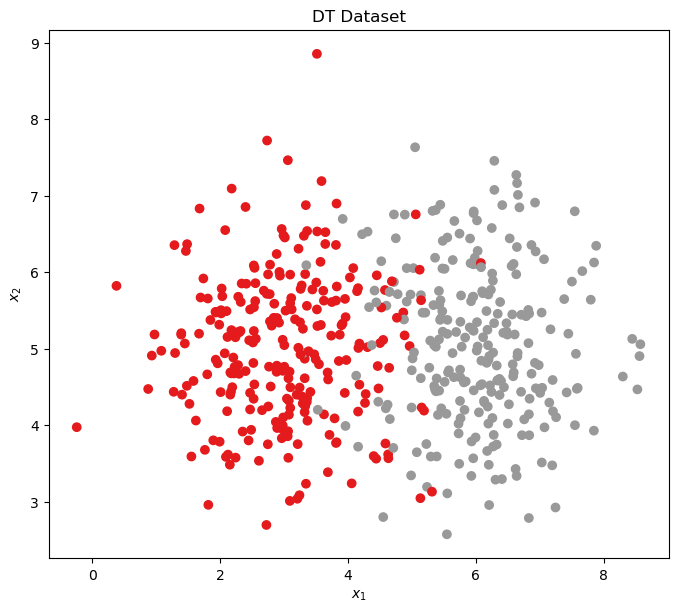

In [12]:
# Decision Tree data generation and splitup
dt_X, dt_y = data_dt()
print('DT dataset shape:', dt_X.shape)
plot_2d(dt_X, dt_y, 'DT Dataset')

dt_X_train, dt_X_test, dt_y_train, dt_y_test = train_test_split(dt_X, dt_y, test_size=.33, random_state=42)

In [13]:
# method to get accuracy of model
def model_score(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return np.array([acc(y_test,y_test_pred),
                     acc(y_train,y_train_pred)])

In [14]:
# Decision Tree Evaluation
def dt_classifier_score(X_train,y_train,X_test,y_test, max_depth=None, min_samples_split=2):
    # print(max_depth)
    model=DTC(
        criterion='entropy', 
        max_depth=max_depth, 
        min_samples_split=min_samples_split
        )
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return np.array([ 1 - acc(y_test,y_test_pred),
                      1 - acc(y_train,y_train_pred)])

In [15]:
# PLOTTING

# plot errors
def plot_test_training_err(param_values, test_err, train_err, title, hyperparam):
    plt.xlabel('$' + hyperparam + '$')
    plt.ylabel('$classification~~error$')
    # plt.ylabel('$score$')
    plt.title(title)
    plt.plot(param_values,test_err,color='red')
    plt.plot(param_values,train_err,color='blue')
    plt.legend(['test','train']);

In [16]:
# DT
criterion = 'entropy'
# min_samples_split best between [2, 40] (see https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680)
# if value too small trees tend to overfit
# Imbalanced class problem: because then regions in which the minority class will be in majority 
# will be very small so min_samples_split should be lower
min_samples_split_nn = 2
min_samples_split_dt = 2
samples_values = np.arange(2, 60, 2)
max_depth_nn = None
max_depth_dt = None
depth_values = np.arange(1, 60, 5)

In [ ]:
# DT Hyperparam Tuning
errors = map(lambda depth: dt_classifier_score(
    nn_X_train, nn_y_train, 
    nn_X_test, nn_y_test, 
    max_depth=depth,
    min_samples_split=min_samples_split_nn), depth_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

plot_test_training_err(depth_values, test_error, train_error, 
title='DT performance on kNN dataset with depth', 
hyperparam='max depth')

- This starts with us specifying a range of possible values for all the hyperparameters

- DT: because of its robustness to noise, tolerance against missing information, handling of irrelevant, redundant predictive attribute values, low computational cost, interpretability, fast run time and robust predictors.

AUC score: 0.813


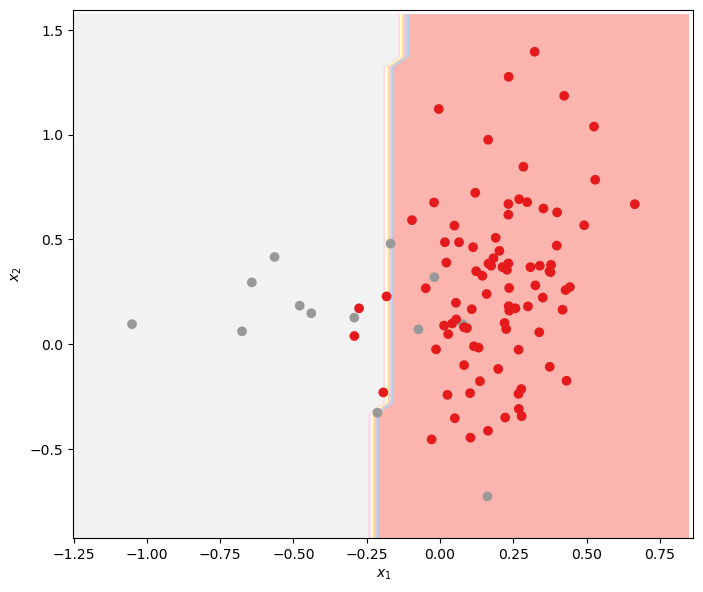

In [26]:
def lda_1():
    tr_X, tr_y = make_classification(
        n_samples=100, #ok
        n_features=2, #ok
        n_redundant=0, #ok
        n_informative=2, #ok
        class_sep=0.2,#ok
        flip_y=0.1, #ok - default
        n_clusters_per_class=1, #ok
        weights=[0.9, 0.1], # Note that the actual class proportions will not exactly match weights when flip_y isn’t 0.
        random_state=1, #ok
        )
    
    return tr_X, tr_y

X, y = lda_1()
lda = LDA()
test_model(lda, X, y)

In [27]:
def data_dt():
    dt_X, dt_y = make_classification(
        n_samples=100,
        n_features=2, 
        n_redundant=0, 
        n_informative=2, 
        class_sep=0.2,
        flip_y=0.01, 
        n_clusters_per_class=1,
        weights=[0.9, 0.1],
        random_state=1,
    )

    # dt_X, dt_y = make_blobs(
    #     n_samples=[250, 50], 
    #     centers=[(3,5),(6,5)],             
    #     n_features=2, 
    #     cluster_std=[3, 1],
    #     random_state=42, 
    #     shuffle=False)

    return dt_X, dt_y

In [32]:
criterion = 'entropy'
# min_samples_split best between [2, 40] (see https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680)
# if value too small trees tend to overfit
# Imbalanced class problem: because then regions in which the minority class will be in majority 
# will be very small so min_samples_split should be lower
min_samples_split_tb = 8
min_samples_split_dt = 2
nsamples = np.arange(2, 60, 2)
max_depth_tb = None
max_depth_dt = None
ndepth = np.arange(1, 60, 5)

# Tree Boosting ADA
ntree=np.array([1,2,3,5,10,20,30,40,50, 100, 200,300])
nrates = np.arange(0.01, 2, 0.2)

AUC score: 0.730


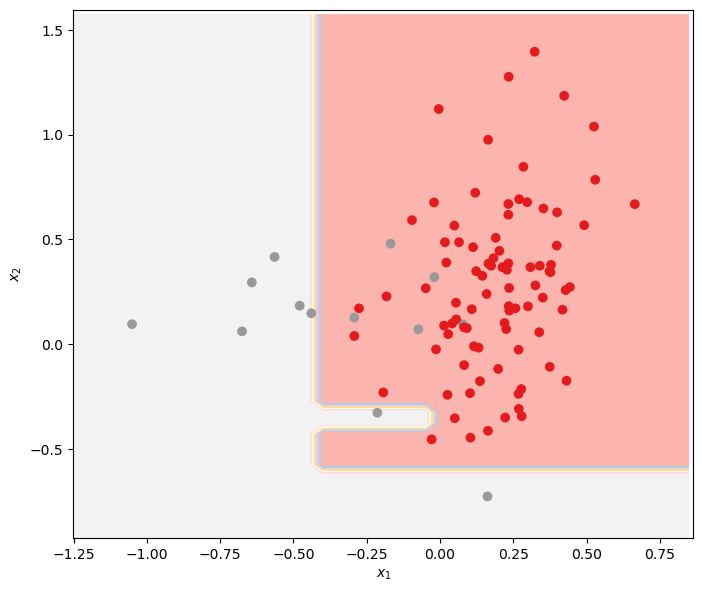

In [31]:
dt_X, dt_y = data_dt()
dtc = DTC()
test_model(dtc, X, y)

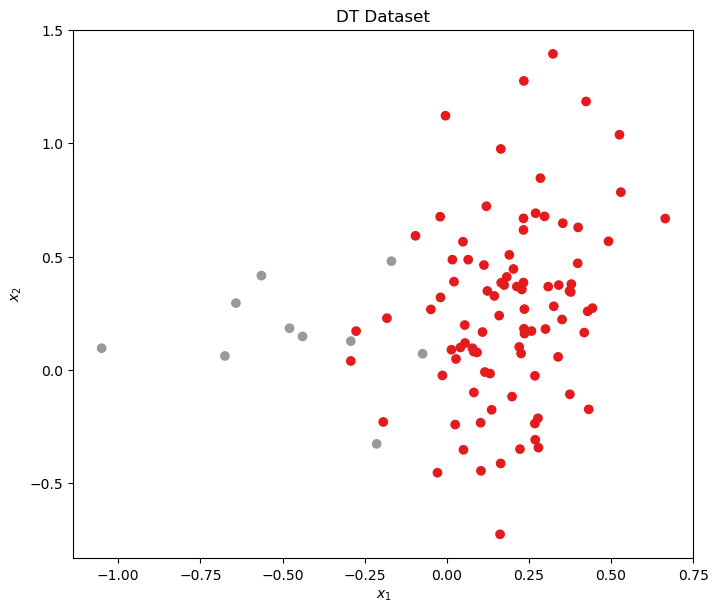

In [28]:
dt_X, dt_y = data_dt()
# print('DT dataset shape X:', dt_X.shape)
# print('DT dataset shape Y:', dt_y.shape)
# print('DT dataset example row X:', dt_X[0])
# print('DT dataset example row Y:', dt_y[0])
plot_2d(dt_X, dt_y, 'DT Dataset')

In [29]:
# DS circular = melhor para DT e pior para LDA

In [30]:
dt_X_train, dt_X_test, dt_y_train, dt_y_test = train_test_split(dt_X, dt_y, test_size=.33, random_state=42)
# print('DT dataset shape X train:', dt_X_train.shape)
# print('DT dataset shape X test:', dt_X_test.shape)